In [766]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
import scipy.stats as st

In [693]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [694]:
df = pd.read_csv('D:\Education\datasets\hw2\wine-clustering.csv', sep = ',', low_memory = False)

# EDA

In [695]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


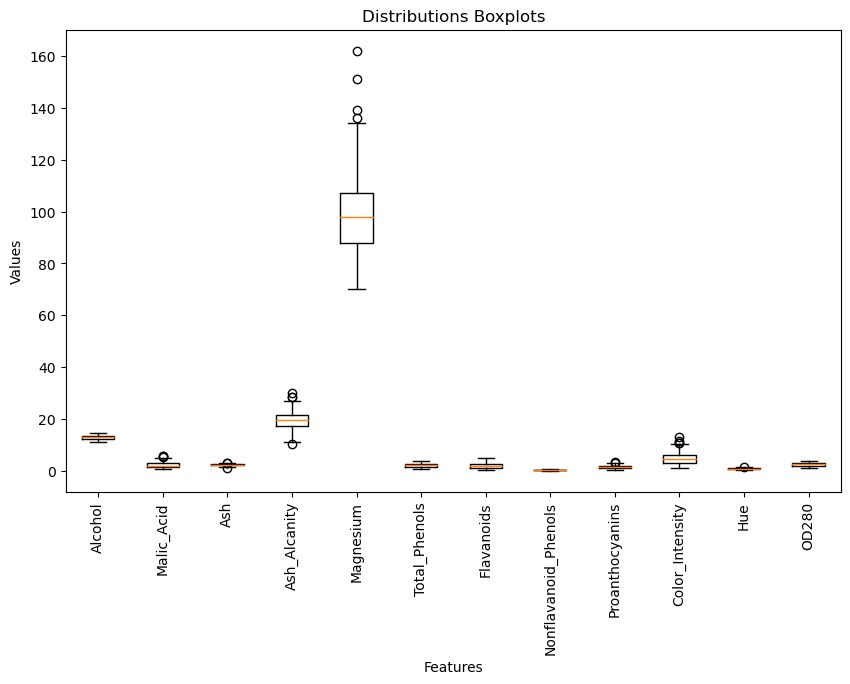

In [696]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot(
    df.drop(columns = ['Proline']),
    labels = df.columns.drop('Proline')
          )


#ax.legend()
plt.xticks(rotation = 'vertical')
plt.title('Distributions Boxplots')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

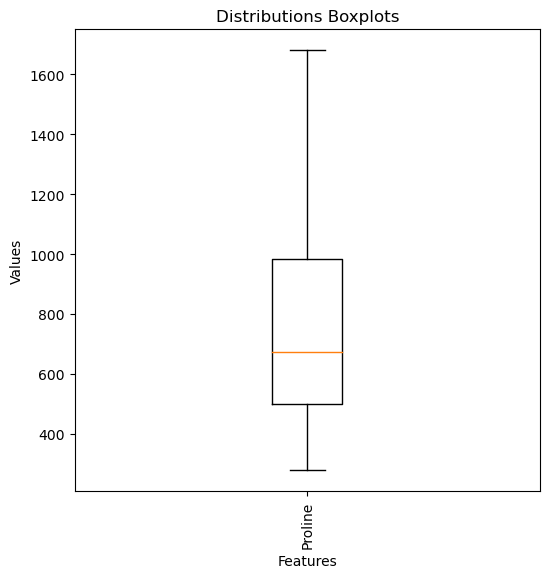

In [697]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.boxplot(
    df.Proline,
    labels = ['Proline']
          )


#ax.legend()
plt.xticks(rotation = 'vertical')
plt.title('Distributions Boxplots')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

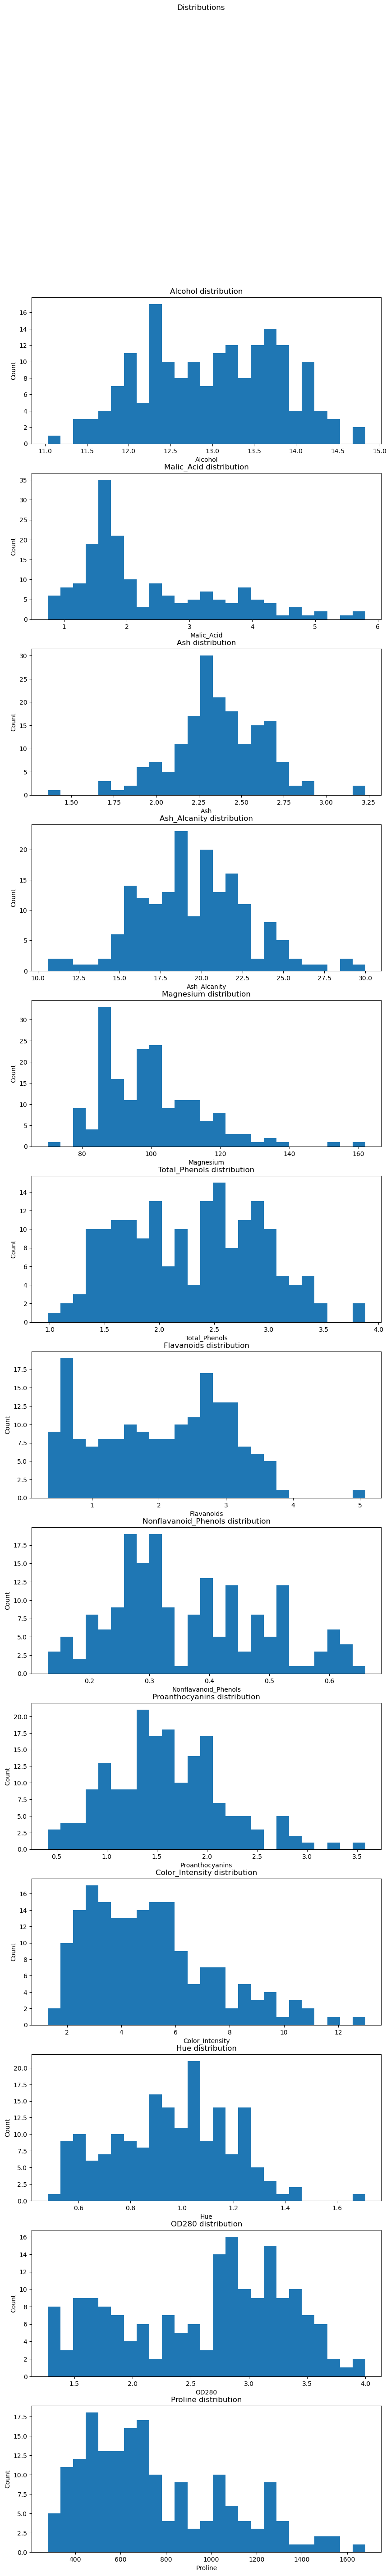

In [698]:
fig, axs = plt.subplots(len(df.columns), figsize=(10, 65))

fig.suptitle('Distributions')

i = 0
for column in df.columns:
            
        axs[i].hist(
            df[column],
            bins = 25
        )      

        axs[i].set_title(column + ' ' + 'distribution')
        axs[i].set_xlabel(column)
        axs[i].set_ylabel('Count') 
        i = i + 1


Выше были представлены два вида графиков, описывающих распределения фичей. График boxplot мы используем для выявления аномалий в данных. Как видно из графиков, в данных присутсвуют аномалии, но в незначительном количестве. По моему скромному мнению, мы можем их оставить в данных. Гистограммы использовались мной с цель визуального определения возможного наличия кластеров в данных. Т.е. если гистограмма имет 2 или более макимума (горба), это может свидетельствовать от том, что в наших данных, возможно, приутствует несколько кластеров. Для примера: гистограммы для фичей Total_Phenols и Nonflavanoid_Phenols имеет несколько условно горбов, которые могут свидетельствовать о наличии минимум двух кластеров. 

Text(120.5815972222222, 0.5, 'Features')

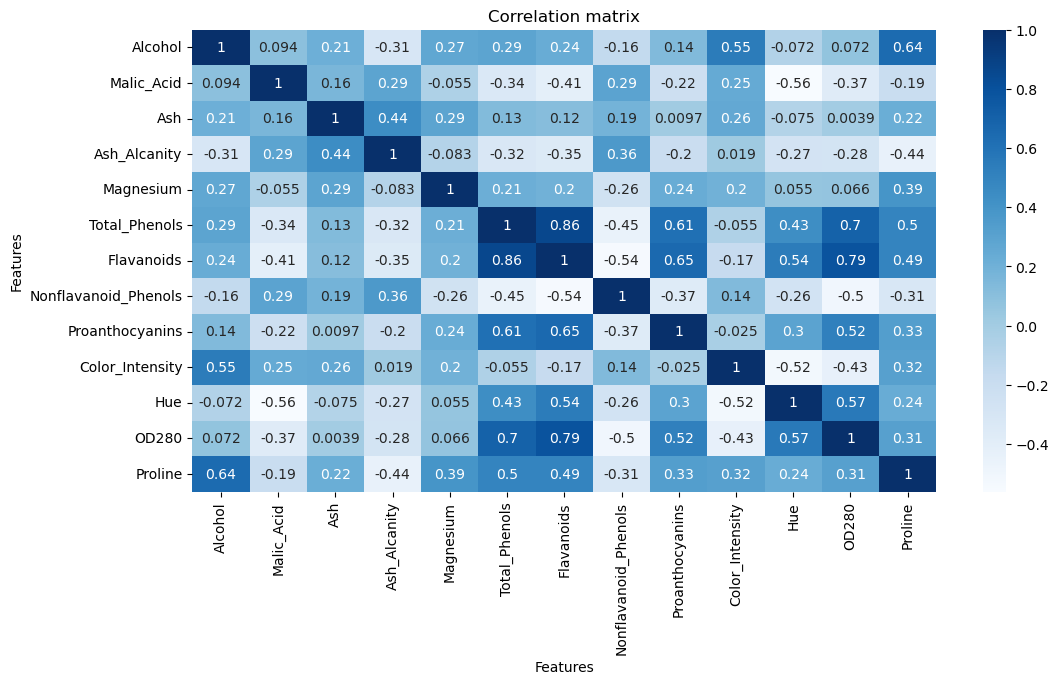

In [699]:
plt.figure(figsize = (12,6))
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.title('Correlation matrix')
plt.xlabel('Features')
plt.ylabel('Features')

In [700]:
df.corr().unstack().sort_values(ascending = False).drop_duplicates()[:10]

Alcohol          Alcohol          1.000000
Total_Phenols    Flavanoids       0.864564
OD280            Flavanoids       0.787194
                 Total_Phenols    0.699949
Proanthocyanins  Flavanoids       0.652692
Proline          Alcohol          0.643720
Proanthocyanins  Total_Phenols    0.612413
OD280            Hue              0.565468
Color_Intensity  Alcohol          0.546364
Hue              Flavanoids       0.543479
dtype: float64

Из представленного выше графика корреляции фичей выделим и удалим наиболее коррелируемые между собой фичи:
OD280 и Flavanoids 

In [701]:
#df.drop(columns = ['OD280', 'Flavanoids', 'Proline'], inplace = True)

Text(120.5815972222222, 0.5, 'Features')

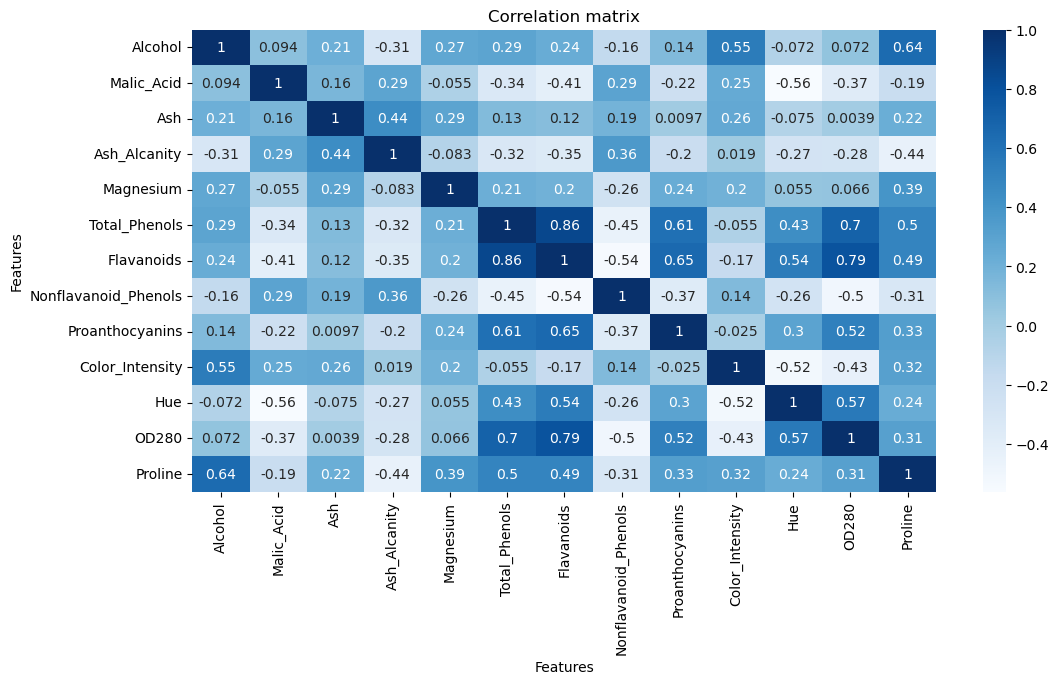

In [702]:
plt.figure(figsize = (12,6))
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.title('Correlation matrix')
plt.xlabel('Features')
plt.ylabel('Features')

## Стандартизация фичей

In [703]:
from sklearn.preprocessing import StandardScaler

In [704]:
scaler = StandardScaler()

In [705]:
df_transformed = scaler.fit_transform(df)

## Уменьшение размерности

In [706]:
from sklearn.decomposition import PCA

In [707]:
pca = PCA(n_components = 2)

In [708]:
df_pca = pd.DataFrame(pca.fit_transform(df_transformed), columns = ['com_1', "com_2"])

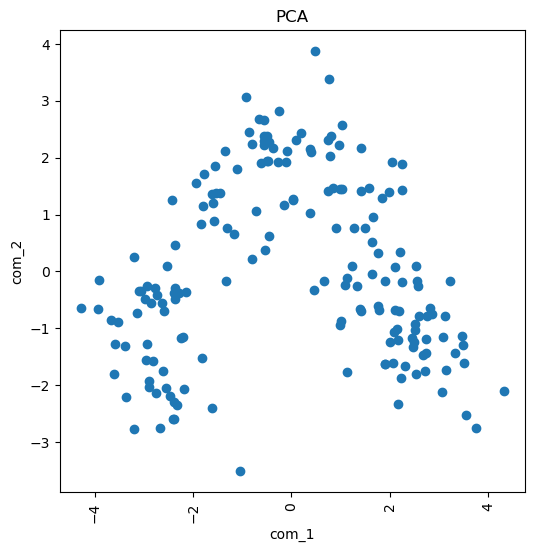

In [709]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(
    df_pca.com_1,
    df_pca.com_2
          )


#ax.legend()
plt.xticks(rotation = 'vertical')
plt.title('PCA')
plt.xlabel('com_1')
plt.ylabel('com_2')
plt.show()

In [710]:
import umap

In [711]:
umap_red = umap.UMAP(n_components = 2)

In [712]:
df_umap = pd.DataFrame(umap_red.fit_transform(df_transformed), columns = ['com_1', 'com_2'])

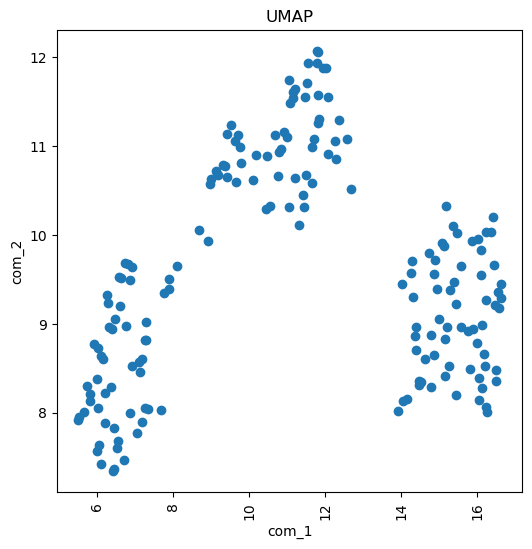

In [713]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(
    df_umap.com_1,
    df_umap.com_2
          )


#ax.legend()
plt.xticks(rotation = 'vertical')
plt.title('UMAP')
plt.xlabel('com_1')
plt.ylabel('com_2')
plt.show()

Как видно из пердставленных графикоф выше, что UMAP, что PCA отлично справились с задачей понижения размерности исходного датасета. Однако, на графике UMAP отчетливо видно 3 кластера, в то время как на графике PCA также можно увидеть очертания трех кластеров, но не настолько явно. Причем на графике PCA два кластера правтически сливаются между собой. В дальниешем для кластеризации будем использовать датасет преобразованный методом UMAP

## Кластеризация

In [714]:
from sklearn.cluster import AgglomerativeClustering

Для примера выбирем число кластеров равное 4. А так же используем различные методы измерения дистанции между кластерами. В дальнейшем построим дендограмму, из которой будет явно видно оптимальное число кластеров.

In [715]:
dist_meth = ['ward', 'complete', 'average', 'single']

In [716]:
df_clust = pd.DataFrame()
for meth in dist_meth:
    ag_cluster = AgglomerativeClustering(n_clusters = 4, linkage = meth, compute_distances = True)
    df_clust = pd.concat([df_clust, pd.DataFrame({'clust' + '_' + meth : ag_cluster.fit_predict(df_umap)})], ignore_index = True, axis = 1)

In [717]:
df_clust.rename(columns = {0 : 'ward', 1 : 'complete', 2 : 'average', 3 : 'single'}, inplace = True)

In [718]:
df_umap_2 = pd.concat([df_umap, df_clust], 
          axis = 1)

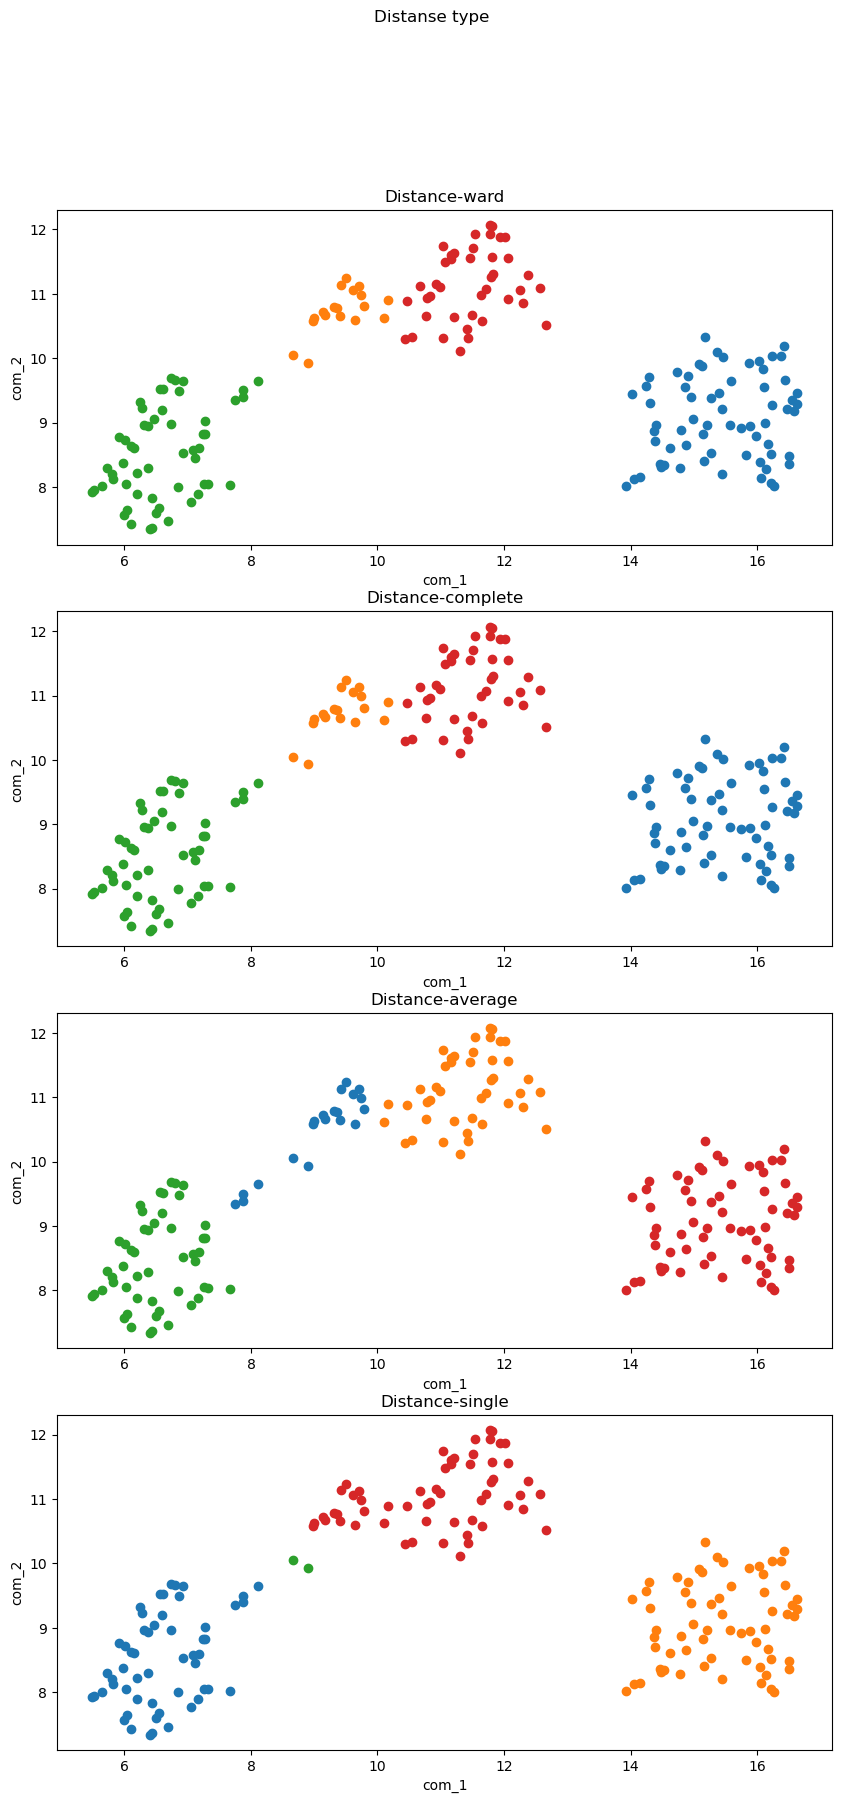

In [719]:
fig, axs = plt.subplots(len(dist_meth), figsize = (10, 20))

fig.suptitle('Distanse type')

i = 0
for d_meth in dist_meth:    
     
    axs[i].scatter(
            df_umap_2.com_1.loc[df_umap_2[d_meth] == 0],
            df_umap_2.com_2.loc[df_umap_2[d_meth] == 0],
            color = 'tab:blue'
                  )

    axs[i].scatter(
            df_umap_2.com_1.loc[df_umap_2[d_meth] == 1],
            df_umap_2.com_2.loc[df_umap_2[d_meth] == 1],
            color = 'tab:red'
                  )

    axs[i].scatter(
            df_umap_2.com_1.loc[df_umap_2[d_meth] == 2],
            df_umap_2.com_2.loc[df_umap_2[d_meth] == 2],
            color = 'tab:green'
                  )
    axs[i].scatter(
            df_umap_2.com_1.loc[df_umap_2[d_meth] == 3],
            df_umap_2.com_2.loc[df_umap_2[d_meth] == 3],
            color = 'tab:orange'
                  )
        
    axs[i].set_title('Distance' + '-' + str(d_meth))
    axs[i].set_xlabel('com_1')
    axs[i].set_ylabel('com_2')   
    i = i +1


Как видно из представленных выше графиков, алгортм иерархической кластеризации отлично выделяет два класса. При этом, некоторые наблюдения попадают или в третий или в четвертый класс в зависимости и выбранного метода измерения дистанции.

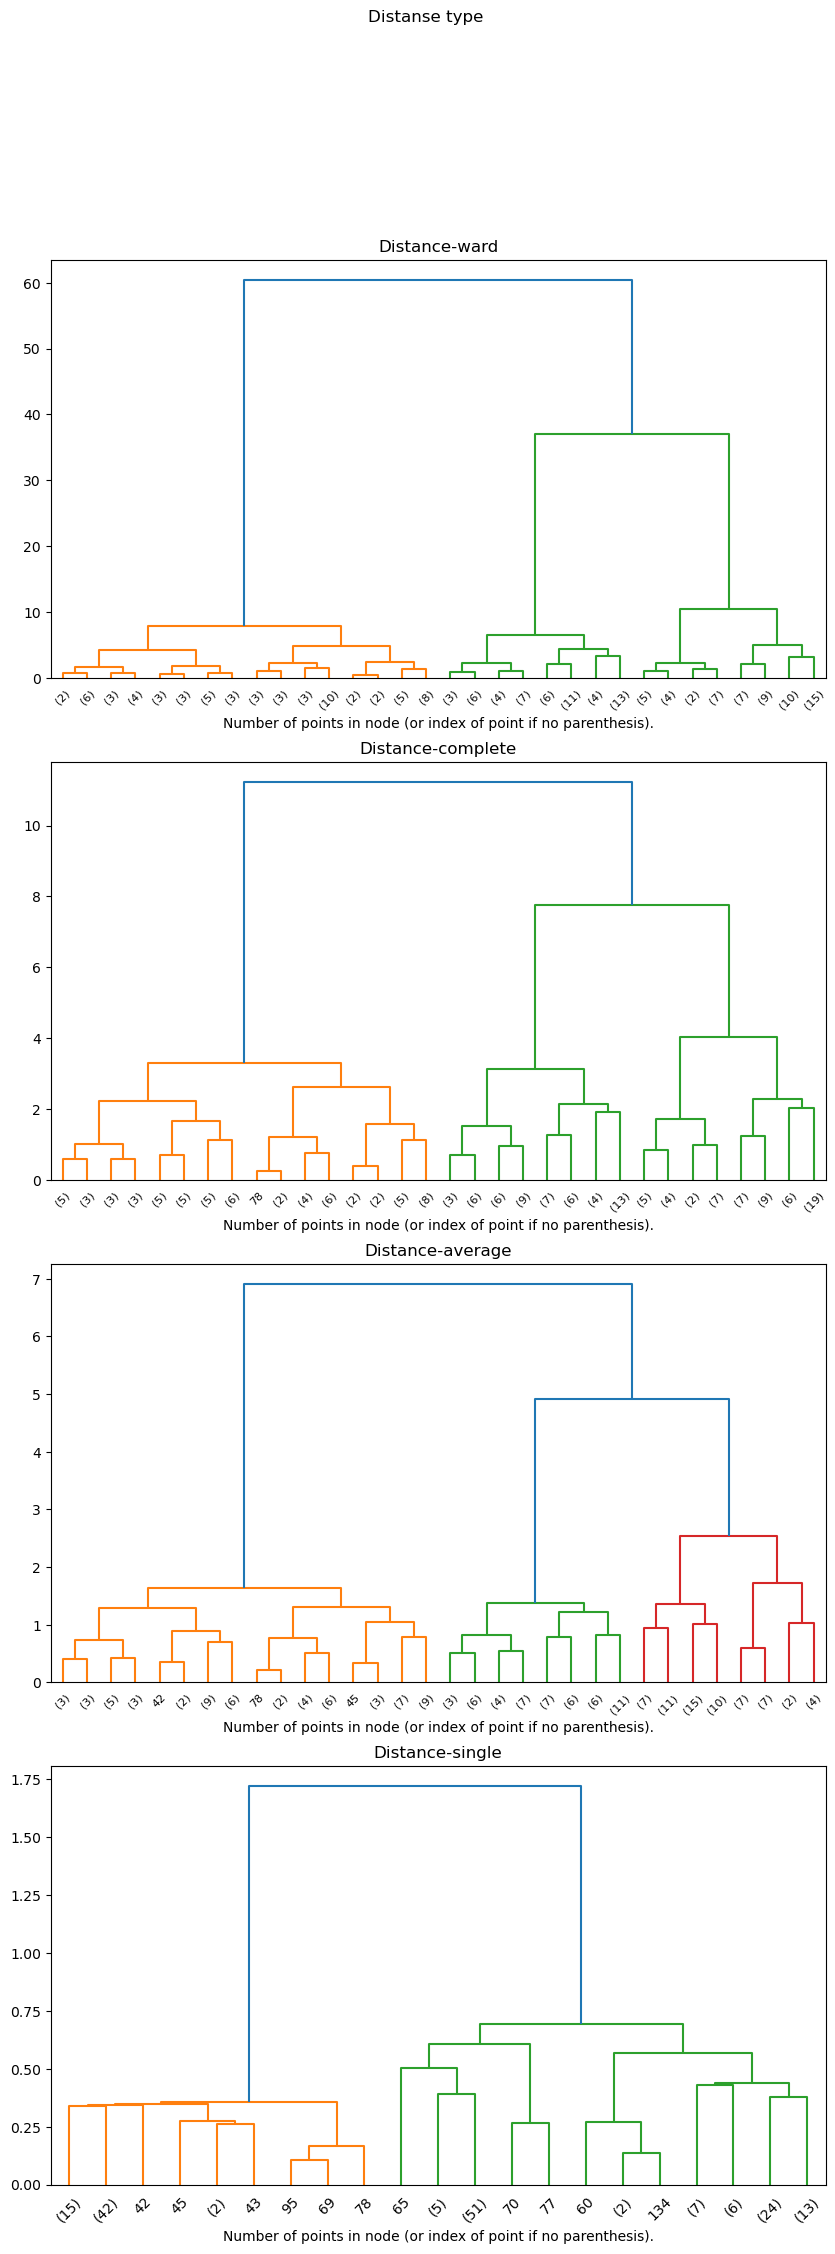

In [720]:
fig, axs = plt.subplots(len(dist_meth), figsize = (10, 25))

fig.suptitle('Distanse type')

i = 0
for d_meth in dist_meth:    
    ag_cluster = AgglomerativeClustering(n_clusters = 4, linkage = d_meth, compute_distances = True)
    ag_cluster.fit(df_umap)
    plot_dendrogram(ag_cluster, truncate_mode = "level", p = 4,  ax = axs[i])
    axs[i].set_title('Distance' + '-' + str(d_meth))
    axs[i].set_xlabel('Number of points in node (or index of point if no parenthesis).')
    i = i + 1


Из пердставлленных выше графиков дендограмм видно, что оптимальное число кластеров будет 3. Пересчитаем модель под 3 кластера.

In [721]:
ag_cluster = AgglomerativeClustering(n_clusters = 3, linkage = 'ward', compute_distances = True)
df_clust = pd.concat([df_umap, pd.DataFrame({'ward' : ag_cluster.fit_predict(df_umap)})], ignore_index = True, axis = 1)

In [722]:
df_clust.rename(columns = {0 : 'com_1', 1 : 'com_2', 2 : 'cluster'}, inplace = True)

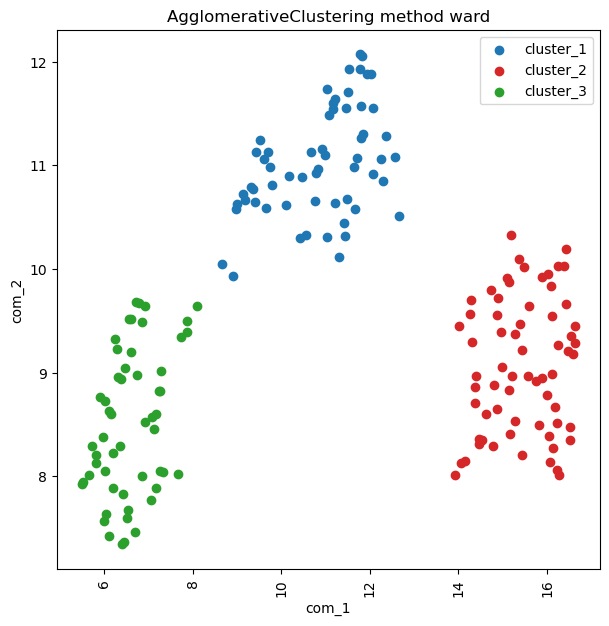

In [723]:
fig, ax = plt.subplots(figsize = (7, 7))

ax.scatter(
    df_clust.com_1.loc[df_clust.cluster == 0],
    df_clust.com_2.loc[df_clust.cluster == 0],
    color = 'tab:blue',
    label = 'cluster_1'
          )

ax.scatter(
    df_clust.com_1.loc[df_clust.cluster == 1],
    df_clust.com_2.loc[df_clust.cluster == 1],
    color = 'tab:red',
    label = 'cluster_2'
          )

ax.scatter(
    df_clust.com_1.loc[df_clust.cluster == 2],
    df_clust.com_2.loc[df_clust.cluster == 2],
    color = 'tab:green',
    label = 'cluster_3'
          )


ax.legend()
plt.xticks(rotation = 'vertical')
plt.title('AgglomerativeClustering method ward')
plt.xlabel('com_1')
plt.ylabel('com_2')
plt.show()

## Поиск различий между кластерами

In [724]:
df_total_clustered = pd.concat([df, df_clust], axis = 1)

In [725]:
df_total_clustered.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'com_1', 'com_2', 'cluster'],
      dtype='object')

In [746]:
df_total_clustered_agg = pd.DataFrame()
for col in df_total_clustered:
    if col not in ['com_1', 'com_2', 'cluster']:
        df_total_clustered_agg = pd.concat([df_total_clustered_agg, df_total_clustered.groupby('cluster').agg({col : 'mean'}).rename(columns = {col : col + '_mean'})], axis = 1)
        df_total_clustered_agg = pd.concat([df_total_clustered_agg, df_total_clustered.groupby('cluster').agg({col : 'std'}).rename(columns = {col : col + '_std'})], axis = 1)
        df_total_clustered_agg = pd.concat([df_total_clustered_agg, df_total_clustered.groupby('cluster').agg({col : 'count'}).rename(columns = {col : col + '_count'})], axis = 1)        
        

In [750]:
df_total_clustered_agg.reset_index(inplace = True)

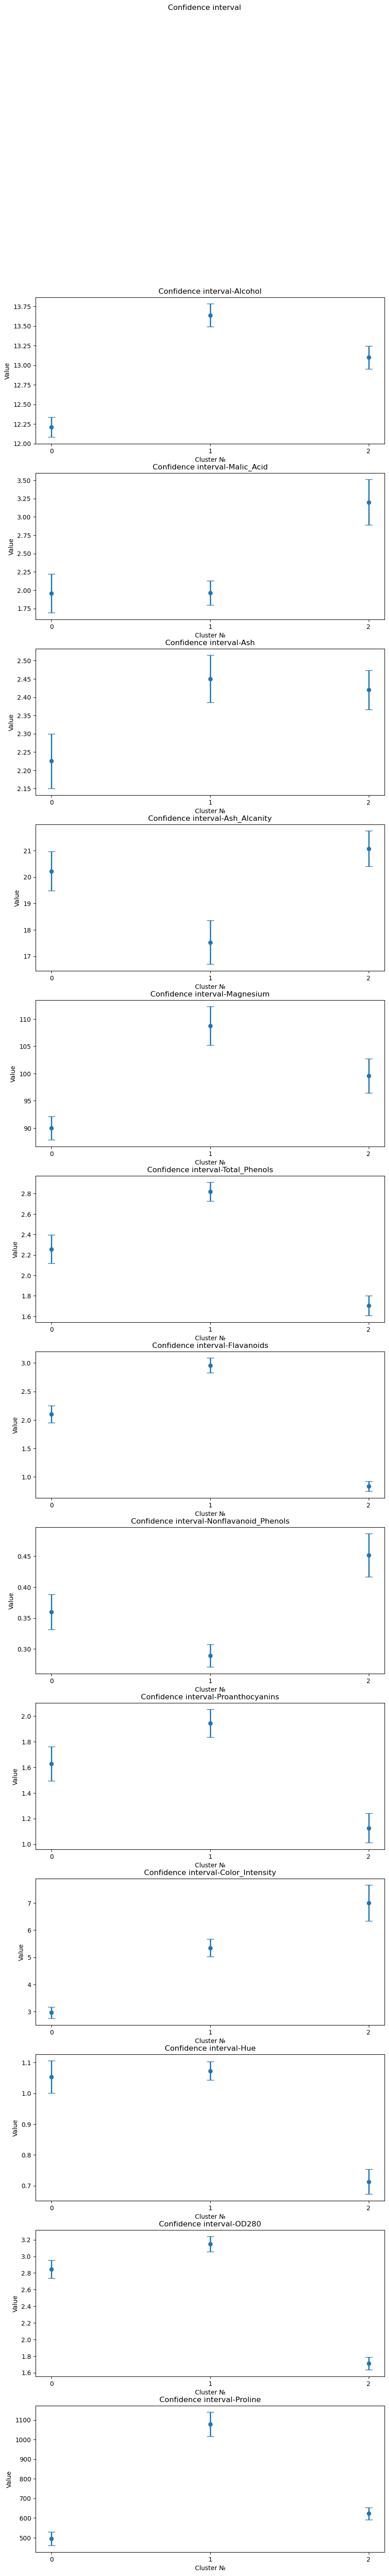

In [760]:
fig, axs = plt.subplots(len(df_total_clustered.columns) - 3, figsize = (10, 65))

fig.suptitle('Confidence interval')

i = 0

for col in df_total_clustered.columns:
    if col in ['com_1', 'com_2', 'cluster']:
        continue
    else:    
        axs[i].errorbar(x = df_total_clustered_agg['cluster'].astype('int').astype('str'),
                y = df_total_clustered_agg[col +'_mean'], 
                yerr = 1.96 * df_total_clustered_agg[col + '_std'] / np.sqrt(df_total_clustered_agg[col + '_count']), 
                fmt = 'o', 
                linewidth = 2, 
                capsize = 6)
        
        axs[i].set_title('Confidence interval' + '-' + col)
        axs[i].set_xlabel('Cluster №')
        axs[i].set_ylabel('Value') 

        i = i + 1


Выше построены графики доверительных интервалов для каждой фичи. Как видно из графиков, между кластерами существует значительная разница. Напремер доверительные инервалы для фичи Proline разнесены на графке, что говорит нам о том, что наши кластеры статистически отличаются друг от друга. Для подтверждения данной теорийй проведем статистический t-test.


In [761]:
from scipy import stats

In [764]:
stats.ttest_ind(df_total_clustered.Color_Intensity.loc[df_total_clustered.cluster == 0], df_total_clustered.Color_Intensity.loc[df_total_clustered.cluster == 1])

TtestResult(statistic=-11.744231910893944, pvalue=9.00413712379859e-22, df=122.0)

In [765]:
stats.ttest_ind(df_total_clustered.Hue.loc[df_total_clustered.cluster == 0], df_total_clustered.Hue.loc[df_total_clustered.cluster == 1])

TtestResult(statistic=-0.6553642298982286, pvalue=0.51346716364544, df=122.0)

Для примера были выбраны 2 фичи: Color_Intensity и Hue. Как видно для Color_Intensity t-test показыват метрики  statistic=-11.744231910893944 и pvalue=9.00413712379859e-22 для кластера 0 и 1, что значит, что данных два кластера отличаются по данной фиче. В тоже время Hue для двух данных кластеров не будет являться значимой фичей для их разделения, т.к tatistic=-0.6553642298982286, pvalue=0.51346716364544

Дополнительно проведем тест ANOVA для некоторых фичей

In [868]:
from scipy.stats import f_oneway

ANOVA_Color_Intensity = f_oneway(df_total_clustered.Color_Intensity.loc[df_total_clustered.cluster == 0], df_total_clustered.Color_Intensity.loc[df_total_clustered.cluster == 1], df_total_clustered.Color_Intensity.loc[df_total_clustered.cluster == 2])

ANOVA_Hue = f_oneway(df_total_clustered.Hue.loc[df_total_clustered.cluster == 0], df_total_clustered.Hue.loc[df_total_clustered.cluster == 1], df_total_clustered.Hue.loc[df_total_clustered.cluster == 2])

ANOVA_Ash = f_oneway(df_total_clustered.Ash.loc[df_total_clustered.cluster == 0], df_total_clustered.Ash.loc[df_total_clustered.cluster == 1], df_total_clustered.Ash.loc[df_total_clustered.cluster == 2])

ANOVA_Proline = f_oneway(df_total_clustered.Proline.loc[df_total_clustered.cluster == 0], df_total_clustered.Proline.loc[df_total_clustered.cluster == 1], df_total_clustered.Proline.loc[df_total_clustered.cluster == 2])

In [869]:
print('ANOVA Color_Intensity:', ANOVA_Color_Intensity,
      '\nANOVA Hue:', ANOVA_Hue,
     '\nANOVA Ash:', ANOVA_Ash,
     '\nANOVA Proline:', ANOVA_Proline)

ANOVA Color_Intensity: F_onewayResult(statistic=84.86703397160649, pvalue=1.7217155213725403e-26) 
ANOVA Hue: F_onewayResult(statistic=88.06104165029788, pvalue=3.453358017678412e-27) 
ANOVA Ash: F_onewayResult(statistic=13.605454821252982, pvalue=3.2205367561907415e-06) 
ANOVA Proline: F_onewayResult(statistic=175.15904999839105, pvalue=1.6938398228829498e-42)


Как видно из предствленных выше результатов, наиболее значимыми фичами, по которым отличаются классы, являются Proline, Hue, Color_Intensity. В то же время Ash тоже является отличительной чертой, но ее показатели по тесту ANOVA значительно меньше, чем у других фичей взятых для теста

## DBSCAN

In [808]:
db = DBSCAN(eps = 1, min_samples = 3)

In [809]:
eps_arr = np.arange(0.1, 1, 0.1)

In [828]:
df_dbscan = df_umap
for eps in eps_arr:
    db = DBSCAN(eps = eps, min_samples = 5)
    df_dbscan = pd.concat([df_dbscan, pd.DataFrame({'eps' + '_'+str(eps) : db.fit_predict(df_umap)})], axis = 1)

In [841]:
# определение кол-ва кластеров в зависимости от радиуса
for eps in eps_arr:
    print(eps, len(df_dbscan['eps' + '_' + str(eps)].unique()))

0.1 1
0.2 4
0.30000000000000004 18
0.4 9
0.5 4
0.6 4
0.7000000000000001 2
0.8 2
0.9 2


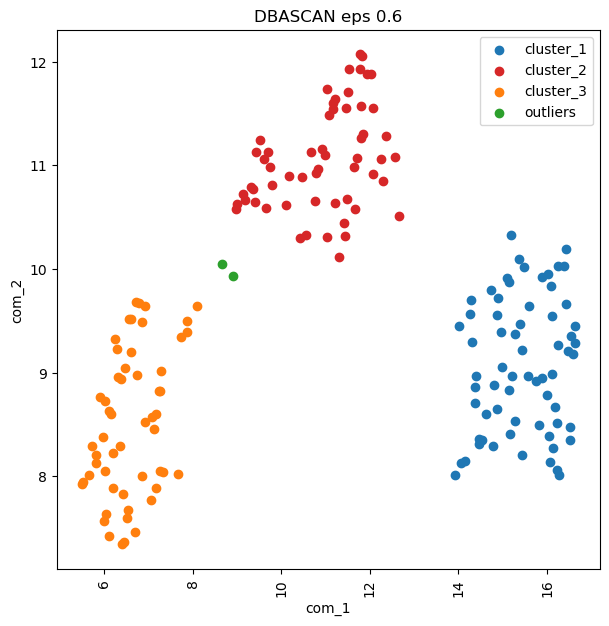

In [837]:
fig, ax = plt.subplots(figsize = (7, 7))

ax.scatter(
    df_dbscan.com_1.loc[df_dbscan['eps_0.6'] == 0],
    df_dbscan.com_2.loc[df_dbscan['eps_0.6'] == 0],
    color = 'tab:blue',
    label = 'cluster_1'
          )

ax.scatter(
    df_dbscan.com_1.loc[df_dbscan['eps_0.6'] == 1],
    df_dbscan.com_2.loc[df_dbscan['eps_0.6'] == 1],
    color = 'tab:red',
    label = 'cluster_2'
          )

ax.scatter(
    df_dbscan.com_1.loc[df_dbscan['eps_0.6'] == 2],
    df_dbscan.com_2.loc[df_dbscan['eps_0.6'] == 2],
    color = 'tab:orange',
    label = 'cluster_3'
          )

ax.scatter(
    df_dbscan.com_1.loc[df_dbscan['eps_0.6'] == -1],
    df_dbscan.com_2.loc[df_dbscan['eps_0.6'] == -1],
    color = 'tab:green',
    label = 'outliers'
          )

ax.legend()
plt.xticks(rotation = 'vertical')
plt.title('DBASCAN eps 0.6')
plt.xlabel('com_1')
plt.ylabel('com_2')
plt.show()

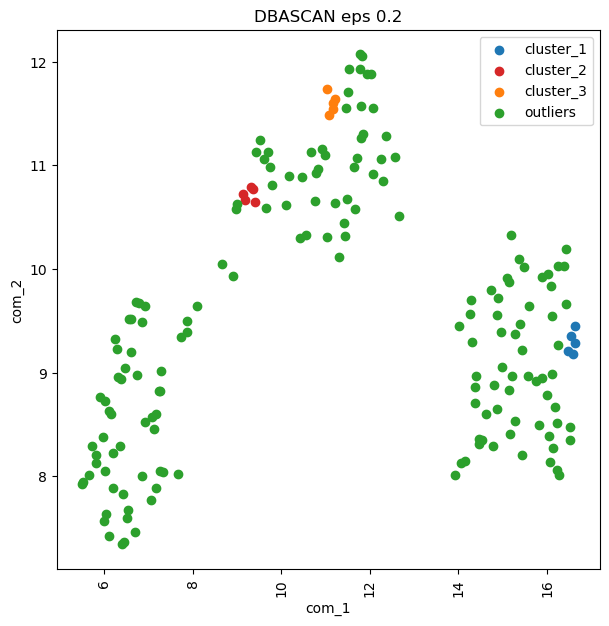

In [838]:
fig, ax = plt.subplots(figsize = (7, 7))

ax.scatter(
    df_dbscan.com_1.loc[df_dbscan['eps_0.2'] == 0],
    df_dbscan.com_2.loc[df_dbscan['eps_0.2'] == 0],
    color = 'tab:blue',
    label = 'cluster_1'
          )

ax.scatter(
    df_dbscan.com_1.loc[df_dbscan['eps_0.2'] == 1],
    df_dbscan.com_2.loc[df_dbscan['eps_0.2'] == 1],
    color = 'tab:red',
    label = 'cluster_2'
          )

ax.scatter(
    df_dbscan.com_1.loc[df_dbscan['eps_0.2'] == 2],
    df_dbscan.com_2.loc[df_dbscan['eps_0.2'] == 2],
    color = 'tab:orange',
    label = 'cluster_3'
          )

ax.scatter(
    df_dbscan.com_1.loc[df_dbscan['eps_0.2'] == -1],
    df_dbscan.com_2.loc[df_dbscan['eps_0.2'] == -1],
    color = 'tab:green',
    label = 'outliers'
          )




ax.legend()
plt.xticks(rotation = 'vertical')
plt.title('DBASCAN eps 0.2')
plt.xlabel('com_1')
plt.ylabel('com_2')
plt.show()

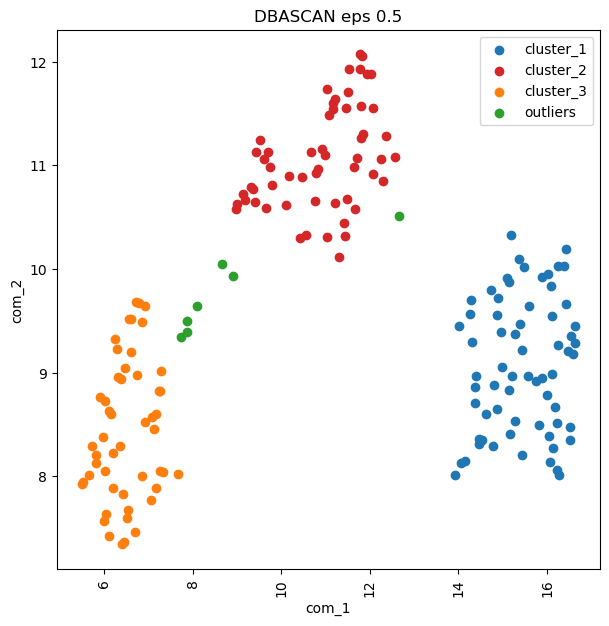

In [842]:
fig, ax = plt.subplots(figsize = (7, 7))

ax.scatter(
    df_dbscan.com_1.loc[df_dbscan['eps_0.5'] == 0],
    df_dbscan.com_2.loc[df_dbscan['eps_0.5'] == 0],
    color = 'tab:blue',
    label = 'cluster_1'
          )

ax.scatter(
    df_dbscan.com_1.loc[df_dbscan['eps_0.5'] == 1],
    df_dbscan.com_2.loc[df_dbscan['eps_0.5'] == 1],
    color = 'tab:red',
    label = 'cluster_2'
          )

ax.scatter(
    df_dbscan.com_1.loc[df_dbscan['eps_0.5'] == 2],
    df_dbscan.com_2.loc[df_dbscan['eps_0.5'] == 2],
    color = 'tab:orange',
    label = 'cluster_3'
          )

ax.scatter(
    df_dbscan.com_1.loc[df_dbscan['eps_0.5'] == -1],
    df_dbscan.com_2.loc[df_dbscan['eps_0.5'] == -1],
    color = 'tab:green',
    label = 'outliers'
          )

ax.legend()
plt.xticks(rotation = 'vertical')
plt.title('DBASCAN eps 0.5')
plt.xlabel('com_1')
plt.ylabel('com_2')
plt.show()

Выше представленны три графика алгоритма кластерезации DBSCAN с различными величинами радиусов (eps = [0.2, 0.5, 0.6]). Данные значения были выбраны для сравнения, т.к кол-во кластеров при использовании данных радиусов получается одинаковым. При этом стоит отметить, что при eps = 0.2 (радиус минимален), мы получаем 3  мини кластера с максимальной плотностью, вто время как все остальные значения у нас записываются как выбросы. Для eps = [0.5, 0.6] мы получаем схожую картину кластеров, как и при иерархической кластеризации, при этом алгоритм DBSCAN может выявить значение, неподходящие ни к одному из кластеров(аномалии).